### **אמידה נקודתית ושיטת המומנטים**

---

### **מבוא:**

אמידה נקודתית היא שימוש בנתוני מדגם לחישוב ערך בודד שמיועד לשמש כ"ניחוש הטוב ביותר" עבור פרמטר לא ידוע של פונקציית יצירת הנתונים ($DGP$). שיטת המומנטים היא דרך פשוטה לאמוד פרמטרים סטטיסטיים על ידי השוואת מומנטים תיאורטיים למומנטים מדגמיים.

---

### **אמידת פרמטר בהתפלגות מעריכית:**

נניח כי \($ x_1, x_2, \ldots, x_n$ \) הם דגימות מהתפלגות מעריכית. אנו רוצים לאמוד את פרמטר הקצב \($ \lambda$ \). המומנט הראשון של התפלגות מעריכית הוא \($ E(X) = \frac{1}{\lambda} $\). נשתמש בממוצע המדגם כדי לאמוד את \($ \lambda$ \).

### **ייבוא ספריות:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **יצירת מדגם וביצוע אמידה באמצעות שיטת המומנטים:**

In [2]:
# Step 1: Generate a sample from Exponential distribution with λ = 2
true_lambda = 2
sample_size = 1000
sample = np.random.exponential(scale=1/true_lambda, size=sample_size)

# Step 2: Estimate λ using Method of Moments
sample_mean = np.mean(sample)
estimated_lambda = 1 / sample_mean

### **השוואת התפלגות המדגם להתפלגות התאורטית והמוערכת:**

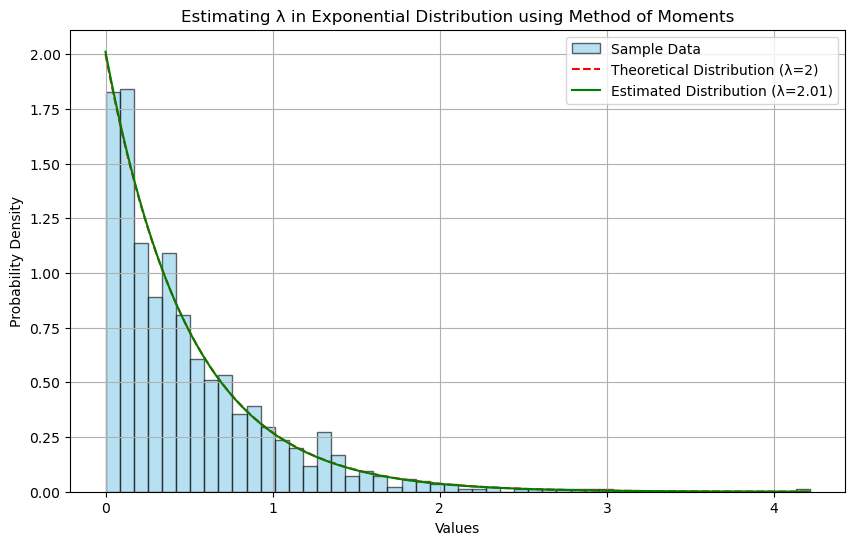

In [3]:
# Step 3: Plotting the sample distribution against theoretical and estimated distributions
x_values = np.linspace(0, max(sample), 1000)
theoretical_pdf = true_lambda * np.exp(-true_lambda * x_values)
estimated_pdf = estimated_lambda * np.exp(-estimated_lambda * x_values)

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sample Data')
plt.plot(x_values, theoretical_pdf, 'r--', label=f'Theoretical Distribution (λ={true_lambda})')
plt.plot(x_values, estimated_pdf, 'g-', label=f'Estimated Distribution (λ={estimated_lambda:.2f})')

plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Estimating λ in Exponential Distribution using Method of Moments')
plt.legend()
plt.grid(True)
plt.show()

### **תוצאות:**

In [4]:
print(f'Sample Mean: {sample_mean:.4f}')
print(f'Estimated λ: {estimated_lambda:.4f}')

Sample Mean: 0.4972
Estimated λ: 2.0114


### **אמידת פרמטר בהתפלגות בינומיאלית (Binomial Distribution):**

אם \($ x_1, x_2, \ldots, x_n $\) הם דגימות מהתפלגות בינומיאלית \( $\text{Binomial}(n, p)$ \), אנו רוצים לאמוד את פרמטר ההצלחה \($ p $\).

1. **המומנט הראשון (הממוצע התיאורטי):**  
   $$ [
   E(X) = n \cdot p
   ]$$

2. **נשווה לממוצע המדגמי:**  
   $$[
   \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
   ]$$

3. **אומדן ל-\( $p$ \):**  
   $$ [
   \hat{p} = \frac{\bar{x}}{n}
   ] $$

In [ ]:
# Example: Estimating p in Binomial Distribution
n_trials = 10
true_p = 0.3
sample_size = 1000
sample_binomial = np.random.binomial(n=n_trials, p=true_p, size=sample_size)

# Estimate p
sample_mean_binomial = np.mean(sample_binomial)
estimated_p = sample_mean_binomial / n_trials

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(sample_binomial, bins=range(n_trials+2), density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sample Data')
plt.axvline(sample_mean_binomial, color='g', linestyle='--', label=f'Estimated Mean (p={estimated_p:.2f})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability Density')
plt.title('Estimation of p in Binomial Distribution Using Method of Moments')
plt.legend()
plt.grid(True)
plt.show()

### **אמידת פרמטרים בהתפלגות נורמלית (Normal Distribution):**

אם \($ x_1, x_2, \ldots, x_n $\) הם דגימות מהתפלגות נורמלית \($ \text{Normal}($\mu$, \sigma^2)$ \), אנו רוצים לאמוד את התוחלת \( $\mu$ \) ואת סטיית התקן \( $\sigma $\).

1. **המומנט הראשון (תוחלת):**  
   $$[
   \hat{$\mu$} = $\bar{x}$
   \]$$

2. **המומנט השני (שונות):**  
   \[
   \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - $\bar{x}$)^2
   \]

In [ ]:
# Example: Estimating μ and σ in Normal Distribution
true_mu = 5
true_sigma = 2
sample_normal = np.random.normal(loc=true_mu, scale=true_sigma, size=sample_size)

# Estimate μ and σ
estimated_mu = np.mean(sample_normal)
estimated_sigma = np.std(sample_normal)

# Plotting
x_values_normal = np.linspace(min(sample_normal), max(sample_normal), 1000)
theoretical_pdf_normal = (1 / (true_sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values_normal - true_mu) / true_sigma) ** 2)
estimated_pdf_normal = (1 / (estimated_sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values_normal - estimated_mu) / estimated_sigma) ** 2)

plt.figure(figsize=(10, 6))
plt.hist(sample_normal, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sample Data')
plt.plot(x_values_normal, theoretical_pdf_normal, 'r--', label=f'Theoretical Distribution (μ={true_mu}, σ={true_sigma})')
plt.plot(x_values_normal, estimated_pdf_normal, 'g-', label=f'Estimated Distribution (μ={estimated_mu:.2f}, σ={estimated_sigma:.2f})')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Estimation of μ and σ in Normal Distribution Using Method of Moments')
plt.legend()
plt.grid(True)
plt.show()

### **אמידת פרמטר בהתפלגות פואסון (Poisson Distribution):**

אם \( $x_1, x_2, \ldots, x_n $\) הם דגימות מהתפלגות פואסון \($ \text{Poisson}(\lambda)$ \), אנו רוצים לאמוד את פרמטר הקצב \($ \lambda $\).

1. **המומנט הראשון (הממוצע התיאורטי):**  
   $$ [
   E(X) = \lambda
   ] $$

2. **נשווה לממוצע המדגמי:**  
   $$ [
   \hat{\lambda} = \bar{x}
   ] $$

In [ ]:
# Example: Estimating λ in Poisson Distribution
true_lambda_poisson = 3
sample_poisson = np.random.poisson(lam=true_lambda_poisson, size=sample_size)

# Estimate λ
estimated_lambda_poisson = np.mean(sample_poisson)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(sample_poisson, bins=range(int(max(sample_poisson))+2), density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sample Data')
plt.axvline(estimated_lambda_poisson, color='g', linestyle='--', label=f'Estimated λ = {estimated_lambda_poisson:.2f}')
plt.xlabel('Number of Events')
plt.ylabel('Probability Density')
plt.title('Estimation of λ in Poisson Distribution Using Method of Moments')
plt.legend()
plt.grid(True)
plt.show()